In [1]:
import numpy as np
import time
from function import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
sns.set()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df.iloc[:, 1:-1]))
Y = LabelEncoder().fit_transform(df.iloc[:, -1])

In [4]:
hidden_size = 20
momentum = 0.9
learning_rate = 0.005

W1 = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])
W1_v = np.zeros(W1.shape)
b1 = np.zeros((1, X.shape[1]))
b1_v = np.zeros(b1.shape)
W2 = np.random.randn(X.shape[1], hidden_size) / np.sqrt(X.shape[1])
W2_v = np.zeros(W2.shape)
b2 = np.zeros((1, hidden_size))
b2_v = np.zeros(b2.shape)
W3 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
W3_v = np.zeros(W3.shape)
b3 = np.zeros((1, 3))
b3_v = np.zeros(b3.shape)

In [8]:
def predict(inputs):
    z1 = inputs * (W1 - momentum * W1_v) + (b1 - momentum * b1_v)
    a1 = np.tanh(z1)
    z2 = a1.dot((W2 - momentum * W2_v)) + (b2 - momentum * b2_v)
    a2 = np.tanh(z2)
    z3 = a2.dot((W3 - momentum * W3_v)) + (b3 - momentum * b3_v)
    exp_scores = np.exp(z3)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [6]:
def training(epoch):
    global W1,b1,W2,b2,W3,b3,W1_v,b1_v,W2_v,b2_v,W3_v,b3_v
    z1 = X * (W1 - momentum * W1_v) + (b1 - momentum * b1_v)
    a1 = np.tanh(z1)
    z2 = a1.dot((W2 - momentum * W2_v)) + (b2 - momentum * b2_v)
    a2 = np.tanh(z2)
    z3 = a2.dot((W3 - momentum * W3_v)) + (b3 - momentum * b3_v)
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    accuracy = np.mean(np.argmax(probs,axis=1) == Y)
    delta4 = probs
    delta4[range(X.shape[0]), Y] -= 1
    dW3 = (a2.T).dot(delta4)
    db3 = np.sum(delta4, axis=0, keepdims=True)
    delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.mean(np.dot(X.T, delta2),axis=0)
    db1 = np.sum(delta2, axis=0)
    W1_v = W1_v * momentum + learning_rate * dW1
    W1 += -W1_v
    b1_v = b1_v * momentum + learning_rate * db1
    b1 += -b1_v
    W2_v = W2_v * momentum + learning_rate * dW2
    W2 += -W2_v
    b2_v = b2_v * momentum + learning_rate * db2
    b2 += -b2_v
    W3_v = W3_v * momentum + learning_rate * dW3
    W3 += -W3_v
    b3_v = b3_v * momentum + learning_rate * db3
    b3 += -b3_v
    Z = np.argmax(predict(np.c_[xx.ravel(), yy.ravel()]),axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
    cont = plt.title('Nesterov Gradient Descent decision boundary, epoch %d, accuracy: %f'%(epoch+1, accuracy))
    return cont

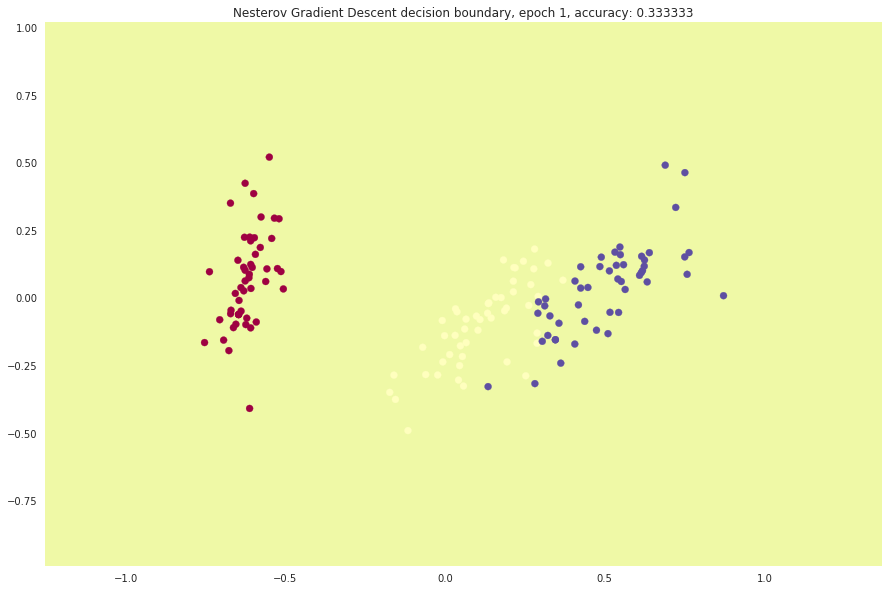

In [9]:
fig = plt.figure(figsize=(15,10))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.argmax(predict(np.c_[xx.ravel(), yy.ravel()]),axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
predicted= np.argmax(predict(X),axis=1)
accuracy = np.mean(Y == predicted)
plt.title('Nesterov Gradient Descent decision boundary, epoch %d, accuracy: %f'%(0, accuracy))
anim = animation.FuncAnimation(fig, training, frames=100, interval=200)
anim.save('animation-nesterov-gradientdescent-iris.gif', writer='imagemagick', fps=5)